Following this for the Neural networks
https://madewithml.com/courses/foundations/neural-networks/

In [2]:
#importing libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


SEED =1234


np.random.seed(SEED)
random.seed(SEED)


In [15]:
#Loading data

url  = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/spiral.csv"

df  =pd.read_csv(url,header=0)



In [16]:
#shuffling the data

df  = df.sample(frac=1).reset_index(drop=True)
df.head(4)

,X1,X2,color
0,0.216604,0.117650,c1
1,-0.027957,-0.015701,c3
2,0.377979,0.060343,c1
3,0.261746,-0.589821,c1


In [18]:
#Data Shapes

X  = df[["X1","X2"]].values
Y = df["color"].values

print(X.shape, Y.shape)



(1500, 2) (1500,)


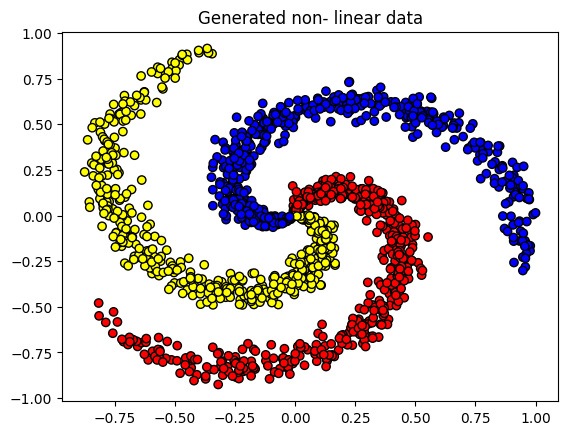

In [21]:
#Visualizing the data
plt.title("Generated non- linear data")
colors = {"c1": "red", "c2": "yellow", "c3": "blue"}

plt.scatter(X[:,0], X[:,1], c=[ colors[_y] for _y in Y], edgecolors= "k")
plt.show()

In [22]:
# Split the data
import collections
from sklearn.model_selection import train_test_split


In [23]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [26]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [28]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=Y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")


X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [-0.18980688 -0.03138864] → c3


#Label Encoding

Implementing our own label encoder 

Encode Target text label to nummeric for building the model


In [29]:
import itertools

In [46]:
#Need to define  methods, fit, encode, decode, save and load
import json

class LabelEncoderImpl(object):


    def __init__(self,class_to_index={}) -> None:

        """ Intialize the object """
        self.class_to_index = {} or class_to_index   #Default class from index. 
  
        self.index_to_class = { v:k for k,v in self.class_to_index.items()} #Default indices from the classes

        self.classes_ = list(self.class_to_index.keys())

        pass

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"
    
    def fit(self,y):
        """Fit the encoders from the class labels"""

        classes = np.unique(y)
        for i , j in enumerate(classes):
            self.class_to_index[i] = j

        self.index_to_class = { v:k  for k,v in self.class_to_index.items()}

        self.classes  = list(self.class_to_index.keys())

        return self
        

        
    def encode(self,y):
        """ Given the class values, return the enoded labels"""

        labels = []

        for i ,item in enumerate(y):

            labels[i] = self.class_to_index[item]
        return labels
    
    def decode(self,y):
        """
        Given the encode labels,  return the class
        """
        classes =[]

        for i,j in enumerate(y):
            classes.append(self.index_to_class[j])
            

    def save(self,path):
        """save the encodings to the path """

        with open(path,"wp") as p:
            contents = {'classes_to_index':self.class_to_index}
            json.dumps(contents,p,indent=4,sort_keys=False)

    @classmethod
    def load(cls,path):
        with open(path,"r") as p:
            kwargs=json.load(fp=p)
        return cls(**kwargs)





In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [48]:
# Fit on train data
label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [50]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: c3
y_train[0]: 2


In [51]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [350 350 350]
weights: {0: 0.002857142857142857, 1: 0.002857142857142857, 2: 0.002857142857142857}


In [52]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)


# Apply scaler on training and test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)


# Check (means should be ~0 and std should be ~1)
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")


X_test[0]: mean: -0.1, std: 1.0
X_test[1]: mean: -0.0, std: 1.0


# Linear model

Before we get to our neural network, we're going to motivate non-linear activation functions by implementing a generalized linear model (logistic regression). We'll see why linear models (with linear activations) won't suffice for our dataset.

In [53]:
import torch
torch.manual_seed(SEED)


from torch import nn
import torch.nn.functional as F


In [61]:
#Shapes for model training

INPUT_DIM = X_train.shape
print(INPUT_DIM) 

# nn.Linear expects the value as int so we'll do

INPUT_DIM = INPUT_DIM[1]
print(INPUT_DIM) #2


(1050, 2)
2


In [62]:
HIDDEN_DIMS = 100
OUTPUT_DIMS = len(classes) #3 classes, again an int

In [ ]:
class LinearModel(nn.Module):
    
    def __init__(self,input_dim,hidden_dim,num_classes) -> None:
        super().__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.fc2 = nn.Linear(hidden_dim,num_classes)


    def forward(self,x_in):
        z=self.fc1(x_in) # Linear activations/ No Activation
        z= self.fc2(z)
        return z

